The objective of this lab is to learn **REST APIs** that allow us to access resources via the internet.

 In this lab, we will be using the [CoinGecko API][1] to create a candlestick graph for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called [PyCoinGecko][2]. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.
 
 [1]: https://www.coingecko.com/en/api
 [2]: https://github.com/man-c/pycoingecko

Recall: Rest APIs function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In [1]:
%pip install pycoingecko
%pip install plotly
%pip install mplfinance
%pip install -U kaleido
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

# %matplotlib nbagg
# %matplotlib inline 

Lets start off by getting the data we need. Using the `get_coin_market_chart_by_id(id, vs_currency, days)`:
- `id` is the name of the coin you want,
- `vs_currency` is the currency you want the price in, and 
- `days` is how many days back from today you want.

In [3]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [4]:
type(bitcoin_data)

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.

In [5]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1674360172041, 22763.67074773826],
 [1674363786218, 22859.592833598555],
 [1674367318591, 22877.25614502751],
 [1674370972020, 22939.06268266951],
 [1674374518654, 22905.933838447523]]

Finally lets turn this data into a Pandas DataFrame.

In [6]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.

In [7]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.

In [8]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

Finally we are now ready to use plotly to create our Candlestick Chart.

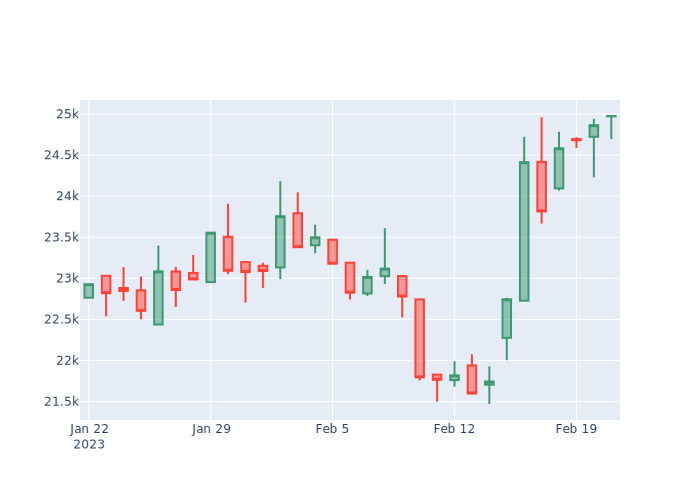

In [9]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show(renderer="svg")